In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [8]:
# Ορισμός της χρονικής περιόδου
start = '2010-01-01'
end = '2023-12-31'

# Ανάκτηση δεδομένων χρησιμοποιώντας το yfinance
aapl = yf.Ticker("AAPL")
df = aapl.history(start=start, end=end)

# Εμφάνιση των πρώτων γραμμών του DataFrame
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.461439  6.493832  6.429651  6.478998  493729600   
2010-01-05 00:00:00-05:00  6.496860  6.526831  6.455989  6.490199  601904800   
2010-01-06 00:00:00-05:00  6.490199  6.515932  6.380303  6.386964  552160000   
2010-01-07 00:00:00-05:00  6.410579  6.418147  6.328838  6.375157  477131200   
2010-01-08 00:00:00-05:00  6.366681  6.418147  6.329141  6.417542  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


/root/jupyterlab_venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [9]:
if 'Adj Close' in df.columns:
    df = df.drop('Adj Close', axis=1)

# Εμφάνιση των πρώτων γραμμών μετά την αφαίρεση της στήλης
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.461439  6.493832  6.429651  6.478998  493729600   
2010-01-05 00:00:00-05:00  6.496860  6.526831  6.455989  6.490199  601904800   
2010-01-06 00:00:00-05:00  6.490199  6.515932  6.380303  6.386964  552160000   
2010-01-07 00:00:00-05:00  6.410579  6.418147  6.328838  6.375157  477131200   
2010-01-08 00:00:00-05:00  6.366681  6.418147  6.329141  6.417542  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


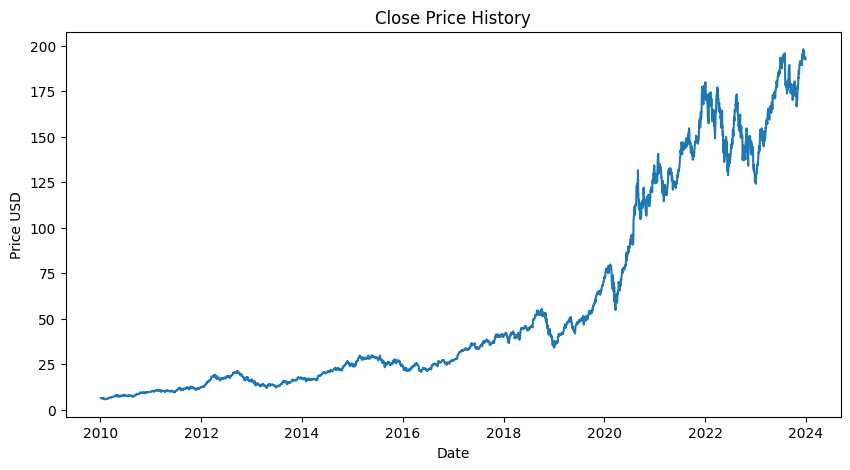

In [10]:
# Απεικόνιση της στήλης 'Close' χρησιμοποιώντας το matplotlib
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-01-04 00:00:00-05:00           NaN
2010-01-05 00:00:00-05:00           NaN
2010-01-06 00:00:00-05:00           NaN
2010-01-07 00:00:00-05:00           NaN
2010-01-08 00:00:00-05:00           NaN
                                ...    
2023-12-22 00:00:00-05:00    181.590315
2023-12-26 00:00:00-05:00    181.614205
2023-12-27 00:00:00-05:00    181.730650
2023-12-28 00:00:00-05:00    181.882712
2023-12-29 00:00:00-05:00    182.014799
Name: Close, Length: 3522, dtype: float64

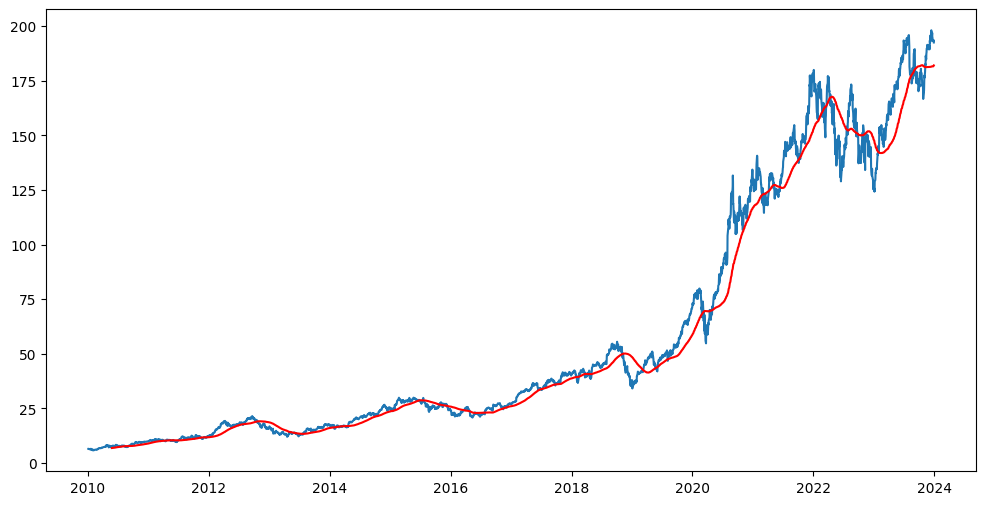

In [12]:
plt.figure (figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'r')

In [13]:
ma200 = df. Close.rolling (200).mean()
ma200

Date
2010-01-04 00:00:00-05:00           NaN
2010-01-05 00:00:00-05:00           NaN
2010-01-06 00:00:00-05:00           NaN
2010-01-07 00:00:00-05:00           NaN
2010-01-08 00:00:00-05:00           NaN
                                ...    
2023-12-22 00:00:00-05:00    178.276934
2023-12-26 00:00:00-05:00    178.502684
2023-12-27 00:00:00-05:00    178.719123
2023-12-28 00:00:00-05:00    178.927156
2023-12-29 00:00:00-05:00    179.127946
Name: Close, Length: 3522, dtype: float64

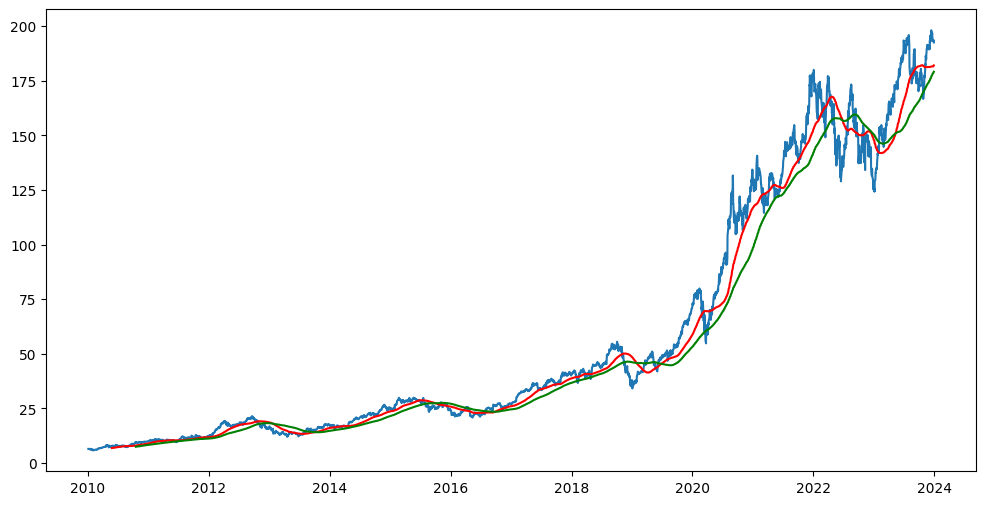

In [14]:
plt.figure(figsize= (12,6))
plt.plot (df. Close)
plt.plot (ma100, 'r')
plt.plot (ma200, 'g')

In [15]:
df.shape

(3522, 7)

In [16]:
data_training = pd.DataFrame (df [ 'Close'][0:int(len (df)*0.70)])
data_testing= pd.DataFrame(df [ 'Close' ][int(len (df) *0.70): int(len (df))])
print (data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [17]:
data_training.head()

,Close
Date,
2010-01-04 00:00:00-05:00,6.478998
2010-01-05 00:00:00-05:00,6.490199
2010-01-06 00:00:00-05:00,6.386964
2010-01-07 00:00:00-05:00,6.375157
2010-01-08 00:00:00-05:00,6.417542


In [18]:
data_testing.head()

,Close
Date,
2019-10-18 00:00:00-04:00,57.407204
2019-10-21 00:00:00-04:00,58.402802
2019-10-22 00:00:00-04:00,58.269241
2019-10-23 00:00:00-04:00,59.051151
2019-10-24 00:00:00-04:00,59.148281


In [19]:
scaler = MinMaxScaler (feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01289802],
       [0.01311534],
       [0.0111125 ],
       ...,
       [0.99580708],
       [0.99133168],
       [0.99561866]])

In [21]:
data_training_array.shape

(2465, 1)

In [22]:
x_train = []
y_train = []
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train= np.array(x_train), np.array(y_train)

In [23]:
# ML Model

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 14s 133ms/step - loss: 0.0234
Epoch 2/50
74/74 [==============================] - 10s 133ms/step - loss: 0.0051
Epoch 3/50
74/74 [==============================] - 9s 127ms/step - loss: 0.0043
Epoch 4/50
74/74 [==============================] - 10s 130ms/step - loss: 0.0041
Epoch 5/50
74/74 [==============================] - 11s 146ms/step - loss: 0.0040
Epoch 6/50
74/74 [==============================] - 11s 143ms/step - loss: 0.0036
Epoch 7/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0034
Epoch 8/50
74/74 [==============================] - 10s 134ms/step - loss: 0.0033
Epoch 9/50
74/74 [==============================] - 10s 133ms/step - loss: 0.0030
Epoch 10/50
74/74 [==============================] - 10s 133ms/step - loss: 0.0032
Epoch 11/50
74/74 [==============================] - 11s 147ms/step - loss: 0.0028
Epoch 12/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0027
Epoch 13/50
74

In [32]:
model.save('my_model.h5')

/root/jupyterlab_venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
data_testing.head()

,Close
Date,
2019-10-18 00:00:00-04:00,57.407204
2019-10-21 00:00:00-04:00,58.402802
2019-10-22 00:00:00-04:00,58.269241
2019-10-23 00:00:00-04:00,59.051151
2019-10-24 00:00:00-04:00,59.148281


In [34]:
data_training.tail(100)

,Close
Date,
2019-05-29 00:00:00-04:00,42.909977
2019-05-30 00:00:00-04:00,43.132526
2019-05-31 00:00:00-04:00,42.351158
2019-06-03 00:00:00-04:00,41.922970
2019-06-04 00:00:00-04:00,43.456684
...,...
2019-10-11 00:00:00-04:00,57.358635
2019-10-14 00:00:00-04:00,57.276062
2019-10-15 00:00:00-04:00,57.142513


In [41]:
past_100_days = data_training.tail(100)

In [45]:
final_df = pd.concat([data_training, data_testing], ignore_index=True)

In [46]:
final_df.head()

,Close
0,6.478998
1,6.490199
2,6.386964
3,6.375157
4,6.417542


In [47]:
input_data = scaler. fit_transform(final_df)
input_data

array([[0.00345729],
       [0.00351554],
       [0.00297868],
       ...,
       [0.97420637],
       [0.97644255],
       [0.9709822 ]])

In [48]:
input_data.shape

(3522, 1)

In [57]:
x_test = []
y_test = []

for i in range (100, input_data.shape [0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [58]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(3422, 100, 1)
(3422,)


In [60]:
# Making Predictions

y_predicted = model.predict (x_test)

107/107 [==============================] - 5s 42ms/step


In [61]:
y_predicted.shape

(3422, 1)

In [62]:
y_test

array([0.00965083, 0.01020657, 0.01082844, ..., 0.97420637, 0.97644255,
       0.9709822 ])

In [63]:
scaler.scale_

array([0.00520032])

In [64]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

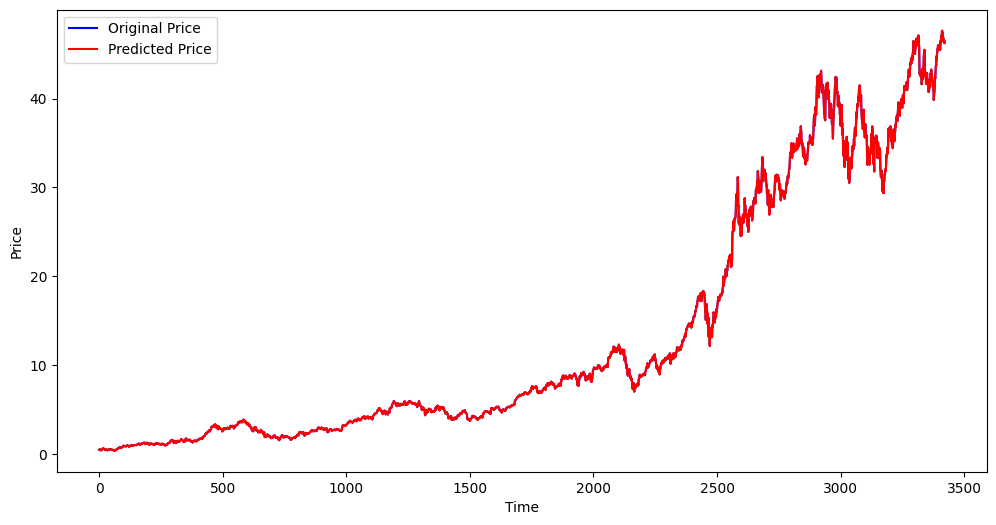

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()